# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [3]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [4]:
df_tr = pd.read_csv('data/tr_types.csv', sep=';', encoding='utf8')
df_tr.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [5]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';', encoding='utf8')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [6]:
from pandas import Timestamp, DateOffset

In [7]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [8]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [9]:
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [10]:
df_transactions_mcc = df_transactions.join(df_mcc.set_index('mcc_code'), on='mcc_code')

In [11]:
df_transactions_mcc.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour,mcc_description
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10,"Звонки с использованием телефонов, считывающих..."
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10,Финансовые институты — снятие наличности автом...
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10,Денежные переводы
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10,"Различные продовольственные магазины — рынки, ..."
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15,"Различные продовольственные магазины — рынки, ..."


In [12]:
df_transactions_mcc = df_transactions.join(df_mcc.set_index('mcc_code'), on='mcc_code')
df_transactions_mcc_pivot = df_transactions_mcc.pivot_table(index=['customer_id'], values='mcc_description', 
                                                            aggfunc=lambda x: ' '.join(x))

In [13]:
df_transactions_mcc_pivot

,mcc_description
customer_id,
6815,"Звонки с использованием телефонов, считывающих..."
22899,"Звонки с использованием телефонов, считывающих..."
27914,Финансовые институты — снятие наличности автом...
28753,"Дантисты, ортодонтисты Финансовые институты — ..."
31385,"Звонки с использованием телефонов, считывающих..."
38084,"Звонки с использованием телефонов, считывающих..."
42096,"Бакалейные магазины, супермаркеты Звонки с исп..."
49101,Финансовые институты — снятие наличности вручн...
49793,"Звонки с использованием телефонов, считывающих..."


## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [14]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


In [15]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [16]:
df_features = df_gender.pipe(gen_features, df_transactions)

/home/saibot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  


In [17]:
label = 'gender'
idx_features = df_features.columns != label

In [18]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [19]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [20]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [21]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [23]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])}


In [24]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV]  clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=1e-05, clf__penalty=l1, clf

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s


[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.2s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   0.3s
[CV] clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   0.5s
[CV] clf__C=0.0005994842503189409, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=7.742636826811278e-05, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV] clf__C=0.0005994842503189409, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=7.742636826811278e-05, clf__penal

[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.4s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   0.8s
[CV] clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   0.6s
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, clf_

[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.3s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.2s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.3s
[CV] clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, clf__random_state=123, sc

[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.8s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.7s


[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.8s
[CV] clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.7s
[CV] clf__C=129.15496650148827, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=129.15496650148827, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False, total=   0.3s
[CV] clf__C=129.15496650148827, clf__penalty=l1, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__C=16.681005372000556, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.4s
[CV] clf__C=129.15496650148827, clf__penalty=l1, clf__ran

[CV] clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.9s
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.4s
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   2.2s
[CV]  clf__C=1000.0, clf__penalty=l2, clf__random_state=123, scaler__with_mean=True, total=   1.2s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   41.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'scaler__with_mean': [False, True], 'clf__penalty': ['l1', 'l2'], 'clf__random_state': [123], 'clf__C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [25]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [26]:
grid_searcher.best_score_

0.8333700479549012

In [27]:
results = pd.DataFrame(grid_searcher.cv_results_)

/home/saibot/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/saibot/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/saibot/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/saibot/anaconda3/lib/python

In [28]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.158233,0.100041,0.500000,0.500000,1e-05,l1,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.037104,0.054713,0.000000,0.000000
1,0.227272,0.018161,0.500000,0.500000,1e-05,l1,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l1', 'clf__...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.061694,0.007186,0.000000,0.000000
2,0.251193,0.035237,0.793321,0.799113,1e-05,l2,123,False,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",34,...,0.790877,0.800359,0.790852,0.796988,0.796070,0.800062,0.090161,0.023545,0.006108,0.001423
3,0.319101,0.022840,0.797828,0.804185,1e-05,l2,123,True,"{'clf__C': 1e-05, 'clf__penalty': 'l2', 'clf__...",33,...,0.805513,0.808778,0.784124,0.799038,0.805717,0.803717,0.060812,0.014627,0.010103,0.004604
4,0.183804,0.020753,0.500000,0.500000,7.74264e-05,l1,123,False,"{'clf__C': 7.742636826811278e-05, 'clf__penalt...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.037229,0.006699,0.000000,0.000000


In [29]:
best_model = grid_searcher.best_estimator_

#### Random Search

In [30]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [31]:
sp_lognorm(4).rvs()

0.25963743321923477

In [32]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'clf__penalty': ['l1', 'l2'], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x133e24250>, 'clf__random_state': [123], 'scaler__with_mean': [False, True]}


In [33]:
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False 
[CV] clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False 
[CV] clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False 
[CV] clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False, total=   0.6s
[CV] clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False, total=   0.5s
[CV] clf__penalty=l1, clf__C=54.0214822195, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__penalty=l1, clf__C=0.0130036861306, clf__random_state=123, scaler__with_mean=False, total=   0.7s
[CV]  clf__penalty=l1, clf__C=0.0130036861306, clf

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.3s


[CV]  clf__penalty=l2, clf__C=0.179846689606, clf__random_state=123, scaler__with_mean=True, total=   2.9s
[CV] clf__penalty=l1, clf__C=0.684657972423, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__penalty=l1, clf__C=0.684657972423, clf__random_state=123, scaler__with_mean=True, total=   1.1s
[CV] clf__penalty=l1, clf__C=0.684657972423, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__penalty=l2, clf__C=0.179846689606, clf__random_state=123, scaler__with_mean=True, total=   2.9s
[CV] clf__penalty=l1, clf__C=0.684657972423, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__penalty=l1, clf__C=0.684657972423, clf__random_state=123, scaler__with_mean=True, total=   1.1s
[CV] clf__penalty=l2, clf__C=0.169326269146, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__penalty=l1, clf__C=0.684657972423, clf__random_state=123, scaler__with_mean=True, total=   1.1s
[CV] clf__penalty=l2, clf__C=0.169326269146, clf__random_state=123, scaler__with_mean=False 
[CV

[CV]  clf__penalty=l1, clf__C=37.6533069054, clf__random_state=123, scaler__with_mean=True, total=   1.0s
[CV] clf__penalty=l1, clf__C=0.00329706433825, clf__random_state=123, scaler__with_mean=True 
[CV] clf__penalty=l1, clf__C=0.00329706433825, clf__random_state=123, scaler__with_mean=True 
[CV]  clf__penalty=l1, clf__C=0.00329706433825, clf__random_state=123, scaler__with_mean=True, total=   0.5s
[CV] clf__penalty=l2, clf__C=0.359702678393, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__penalty=l1, clf__C=0.00329706433825, clf__random_state=123, scaler__with_mean=True, total=   0.5s
[CV]  clf__penalty=l1, clf__C=0.00329706433825, clf__random_state=123, scaler__with_mean=True, total=   0.4s
[CV] clf__penalty=l2, clf__C=0.359702678393, clf__random_state=123, scaler__with_mean=False 
[CV] clf__penalty=l2, clf__C=0.359702678393, clf__random_state=123, scaler__with_mean=False 
[CV]  clf__penalty=l1, clf__C=0.00329706433825, clf__random_state=123, scaler__with_mean=True, total

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.5s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'clf__penalty': ['l1', 'l2'], 'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x133e24250>, 'clf__random_state': [123], 'scaler__with_mean': [False, True]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

Аналогичный выхлоп

In [34]:
random_searcher.best_params_

{'clf__C': 0.066168907176401004,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [35]:
random_searcher.best_score_

0.83315837075874744

In [36]:
results = pd.DataFrame(random_searcher.cv_results_)

In [37]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.309186,0.216570,0.829823,0.83483,0.0130037,l1,123,False,"{u'clf__penalty': u'l1', u'clf__C': 0.01300368...",10,...,0.828339,0.835108,0.826307,0.835925,0.838228,0.833296,0.077364,0.111327,0.004285,0.000864
1,0.908101,0.014748,0.829797,0.84957,54.0215,l1,123,True,"{u'clf__penalty': u'l1', u'clf__C': 54.0214822...",14,...,0.828252,0.849284,0.826534,0.850177,0.836140,0.848428,0.154292,0.004901,0.003311,0.000720
2,5.288787,0.031279,0.832555,0.84843,0.0988254,l1,123,True,"{u'clf__penalty': u'l1', u'clf__C': 0.09882536...",3,...,0.830870,0.847942,0.829224,0.849445,0.838952,0.847168,0.345858,0.038147,0.003359,0.000820
3,1.139398,0.014756,0.829789,0.84957,739.331,l1,123,True,"{u'clf__penalty': u'l1', u'clf__C': 739.331314...",15,...,0.828240,0.849283,0.826529,0.850175,0.836133,0.848430,0.115088,0.004103,0.003311,0.000719
4,0.293335,0.010907,0.500000,0.50000,6.08732e-05,l1,123,False,"{u'clf__penalty': u'l1', u'clf__C': 6.08732348...",19,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.025352,0.002134,0.000000,0.000000


In [38]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [39]:
# sudo pip install networkx==1.11

In [40]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [41]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print best


{'x': -0.038957761372039795}


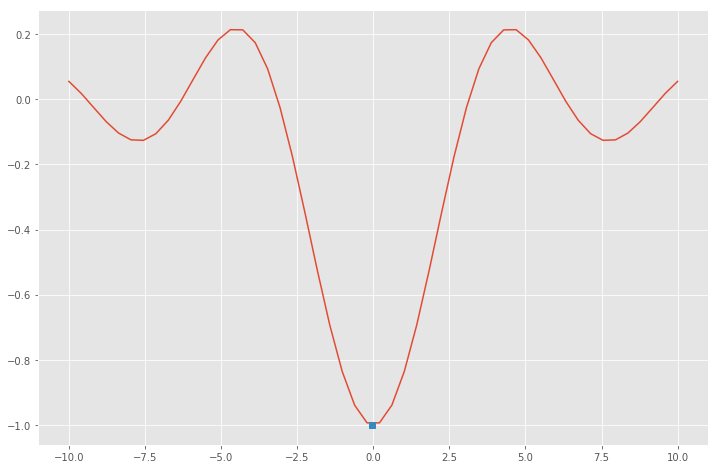

In [42]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [43]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [44]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [45]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.iteritems():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [46]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [47]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [48]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].iteritems():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [49]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [50]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
13,0.029281,0,0,0.836889,-0.003437,0,1
33,0.024695,0,0,0.836832,-0.003512,1,1
17,0.021478,0,0,0.836810,-0.003703,1,1
20,0.028243,0,0,0.836795,-0.003375,1,1
26,0.021217,0,0,0.836793,-0.003715,1,1


## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [51]:
def gen_features(df_gender, df_transactions, df_mcc):
    
    # Возьмем средние суммы по mcc кодам с отрицательным amount
    df_mcc_counts = \
        df_transactions.query('amount < 0')\
                       .pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.mean, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename_axis(lambda x: 'mcc_{}_mean'.format(x), axis=1)
    
    # К временному профилю по часам, добавим временной профиль по дням
    df_weekday_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='weekday', values='amount', 
                         aggfunc=np.size, fill_value=0)
    df_weekday_rations = df_weekday_rations.rename_axis(lambda x: 'weekday_{}'.format(x), axis=1)

    total = df_weekday_rations.sum(axis=1)
    df_weekday_rations = (df_weekday_rations.T/total).T
    
    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T
    
    # Признаки на основе описания транзаций
    df_transactions_mcc = df_transactions.join(df_mcc.set_index('mcc_code'), on='mcc_code')

    df_transactions_mcc_pivot = df_transactions_mcc.loc[:, ['customer_id', 'mcc_description']]\
                                                   .pivot_table(index=['customer_id'], 
                                                                values=['mcc_description'], 
                                                                aggfunc=lambda x: u' '.join(x), fill_value=u'')

    
    df_transactions_mcc_pivot.loc[:, 'mcc_description'] = df_transactions_mcc_pivot.loc[:, 'mcc_description']

    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')\
                           .join(df_weekday_rations, on='customer_id', how='left')\
                           .join(df_transactions_mcc_pivot, on='customer_id', how='left')
                
    df_features.loc[:, 'mcc_description'] = df_features.loc[:, 'mcc_description'].fillna(u'')
    
    df_features = df_features.drop(['customer_id'], axis=1)
    df_features = df_features.fillna(0.0)
        
    return df_features

In [52]:
df_features = df_gender.pipe(gen_features, df_transactions, df_mcc)

In [53]:
label = 'gender'
idx_features = df_features.columns != label

In [54]:
df_features.head()

,gender,mcc_742_mean,mcc_1711_mean,mcc_1731_mean,mcc_1799_mean,mcc_2741_mean,mcc_3000_mean,mcc_3351_mean,mcc_3501_mean,mcc_4111_mean,...,evening,night,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,mcc_description
0,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.325949,0.082278,0.148734,0.129747,0.170886,0.126582,0.189873,0.110759,0.123418,Финансовые институты — снятие наличности автом...
1,1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.042877,0.190871,0.159059,0.174274,0.118949,0.181189,0.156293,0.102351,0.107884,Дилеры по продаже печатной продукции Места общ...
2,1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.196347,0.013699,0.148402,0.150685,0.139269,0.130137,0.173516,0.130137,0.127854,"Горючее топливо — уголь, нефть, разжиженный бе..."
3,1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.216495,0.041237,0.195876,0.175258,0.185567,0.134021,0.061856,0.144330,0.103093,Финансовые институты — снятие наличности автом...
4,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.004246,0.118896,0.135881,0.169851,0.167728,0.138004,0.159236,0.123142,0.106157,Финансовые институты — снятие наличности автом...
5,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.228916,0.048193,0.108434,0.150602,0.144578,0.192771,0.162651,0.114458,0.126506,Финансовые институты — снятие наличности автом...
6,1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.189542,0.124183,0.156863,0.078431,0.176471,0.117647,0.143791,0.183007,0.143791,"Звонки с использованием телефонов, считывающих..."
7,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.112637,0.101648,0.164835,0.153846,0.156593,0.156593,0.175824,0.107143,0.085165,Денежные переводы Звонки с использованием теле...
8,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.223301,0.473786,0.141748,0.161165,0.128155,0.122330,0.151456,0.180583,0.114563,Финансовые институты — снятие наличности автом...
9,1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.008159,0.097902,0.155012,0.166667,0.160839,0.139860,0.135198,0.110723,0.131702,Станции техобслуживания Станции техобслуживани...


In [55]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [56]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [58]:
def run_trials_template_2(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.iteritems():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
            
        # Задаем векторизатор
        if params['vectorizer_type'] == 'count':
            vectorizer = CountVectorizer(max_df=0.95, min_df=5)
        else:
            assert params['vectorizer_type'] == 'tfidf'
            vectorizer = TfidfVectorizer(max_df=0.95, min_df=5)
            
        # Задаем параметры сжимателя
        n_components = params['vectorizer_components']
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        text_feature_col = X_.shape[1]-1
        other_features = range(0, X_.shape[1]-1)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('feature_preproc', FeatureUnion([
                ('text_features', Pipeline([
                    ('text_select', ColumnSelector(col_idx=text_feature_col)),
                    ('vectorizer', vectorizer),
                    ('dimred', TruncatedSVD(n_components=n_components, random_state=RND_SEED))
                ])),
                ('other_features', Pipeline([
                    ('other_select', ColumnSelector(col_idx=other_features)),
                    ('scaler', scaler)
                ]))
            ])),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 4
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [59]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True]),
    'vectorizer_type':  hp.choice('vectorizer_type', ['count', 'tfidf']),
    'vectorizer_components':  hp.choice('vectorizer_components', range(5, 101)),
}

In [60]:
# Запускаем поиск
trials = run_trials_template_2(X, y, space4_lm, evals=40)

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-package

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-package

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-package

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-package

In [61]:
df_trials = trials_df(trials)

In [62]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type,vectorizer_components,vectorizer_type
11,0.037824,1,0,0.832826,-0.005543,1,0,85,0
23,9.660908,1,0,0.832297,-0.004567,1,0,84,1
25,0.069605,1,0,0.832114,-0.005504,1,0,82,0
12,8.921127,1,0,0.832053,-0.004493,1,0,84,1
7,2.231046,0,0,0.831820,-0.005808,1,0,79,0


# Plesase give me certificate. I'm just a girl)))
http://www.catgallery.ru/kototeka/wp-content/uploads/2015/04/Foto-podborka-kosoglazyih-kotikov-3.jpg